# Text Classification

## Project Overview
Document classification or document categorization is a problem in Information science, computer science and arts. The  task <br>is to assign a document to at least one or a lot of categories. this could be done "manually" (or "intellectually") or algorithimically, and also the documents to be classified could also be texts, images, music, etc. every quite document possesses its special classification issues. Documents could also be classified consistent with their subjects or consistent with different attributes (such as document kind, author, printing year etc.). This project can specialize in algorithmic strategies, precisely machine learning algorithms that area unit wide employed in IP and computing. There area unit several classification algorithms akin to Naive Bayes, Decision Tree and etc, all of that have their advantages and downsides. There area unit several public text knowledge set on-line for classification, here, I will be able to apply classification algorithms more on notable 20_newsgroup knowledge set from UCI Machine Learning Repository, that features a assortment of twenty thousand messages, collected from twenty completely different web news newsgroups. The news are classified consistent with their contents.

## Problem Statement
The classification of 20_newsgroup dataset is a supervised classification problem, there are news of 20 categories, each piece of news belongs to one category, the goal is to extract proper features and build an effective model to assign each piece of news to the correct category. 

### Metrics
Here I have used two metrics<br>
1) Classification Report<br>
2) Confusion Matrix

## Algorithm Used in this project
This problem has over 20000 training samples with ten categories,a multi-class classification problem with high dimensions.I will try Multinomial Naive Bayes on this as they work even on Large datasets.They are highly scalable and requires a small amount of training data for classification.

### Libraries required for this project
1) Scikit Learn <br>
2) MatplotLib<br>
3) Numpy<br>
4) Regular Expression<br>
5) Operating System i.e os

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data Extraction and building the training and test data

## What are stop words?
In computing, stop words are words which are filtered out before or after processing of natural language data (text).
These are the words which are used a lot in a language eg. and,the,themselves.
In this classification problem we will remove the stop words and these stop words are not are not helpful in classification of documents.

In [2]:
#We stored a list of stop words in a txt file and now we will copy all the data in a set and will use it in out function
stop_words=()
with open('stop_words.txt','r') as f:
    words=f.read().split()
    stop_words=set(words)

In [3]:
len(stop_words)

759

In [4]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

## Creating a vocabulary
1) Open the directory where all the documents are saved<br>
2) Open each document and perform these steps<br>
      2.1) Open a file in the current document<br>
      2.2) Read the contents of that file and store it in a variable<br>
      2.3) Using regular expression extract only words are store it in a variable<br>
      2.4) Iterate over each word and do the following<br>
              2.4.1) If word consists of only alphabets and length of word is more than 2 and the word is not a stop word<br>
                  -Check if the word is there in the dictionary if it is there<br>
                      -Increase the count by 1<br>
                      -Else add this word and set the count as 1<br>
      repeat from step 2.1 for all the files in the document
              
        

In [5]:
#Create a dictionary
def create_dict(folder_name):
    global comment_word
    vocab=dict()
    relative=folder_name
    for filename in os.listdir(relative):
        new_relative=os.path.join(relative,filename)
        for document in os.listdir(new_relative):
            new_document_relative=os.path.join(new_relative,document)
            f=open(new_document_relative, encoding = "ISO-8859-1")
            words=f.read()
            tokens=re.compile('\w+').findall(words)
            for token in tokens:
                if (token.isalpha() and len(token)>2 and token.lower() not in stop_words):
                    out=token.lower()
                    if out not in vocab.keys():
                        vocab[out]=1
                    else:
                        vocab[out]+=1
    return vocab

In [6]:
vocabulary=create_dict('20_newsgroups/')

In [7]:
#Number of words in the vocabulary is 74016
len(vocabulary)

74016

In [8]:
#Words sorted according to their word count in reverse order i.e word having the max count is the first word in our list 
#Now we will use this to find the number of words with a particular frequency and will lot the graph to hae a better understanding
import operator
sorted_by_value = sorted(vocabulary.items(), key=operator.itemgetter(1),reverse=True)

In [9]:
sorted_by_value[:5]

[('cmu', 38928),
 ('news', 24977),
 ('srv', 24034),
 ('cantaloupe', 19288),
 ('net', 18899)]

In [10]:
#Now we will make two lists from our dictionary and then we will use it to make a dictionary of word count and frequency 
#this dictionary will basically have key as count of words and value as word count 
words=list()
count=list()

In [11]:
for i in range(len(sorted_by_value)):
    words.append(sorted_by_value[i][0])
    count.append(sorted_by_value[i][1])

In [12]:
sorted_by_value[:5]

[('cmu', 38928),
 ('news', 24977),
 ('srv', 24034),
 ('cantaloupe', 19288),
 ('net', 18899)]

### Plotting the graph of word count and number of words that have this count

In [13]:
#Taking only distinct values of count
ab=set(count)

In [14]:
#We will create a dictionary of words_frequency and will use this to plot the graph
words_freq=dict()

In [15]:
#Creating our dictionary
for i in ab:
    words_freq[count.count(i)]=i

In [16]:
#Sorting our dictonary on the basis of value ans this will make a tuple
sorted_by_freq = sorted(words_freq.items(), key=operator.itemgetter(1),reverse=True)

In [17]:
#Now we will make 2 lists from this tuple so that we can easily plot this
num_of_words=[]
freq_of_words=[]
for i in range(len(sorted_by_freq)):
    num_of_words.append(sorted_by_freq[i][0])
    freq_of_words.append(sorted_by_freq[i][1])

<Container object of 10 artists>

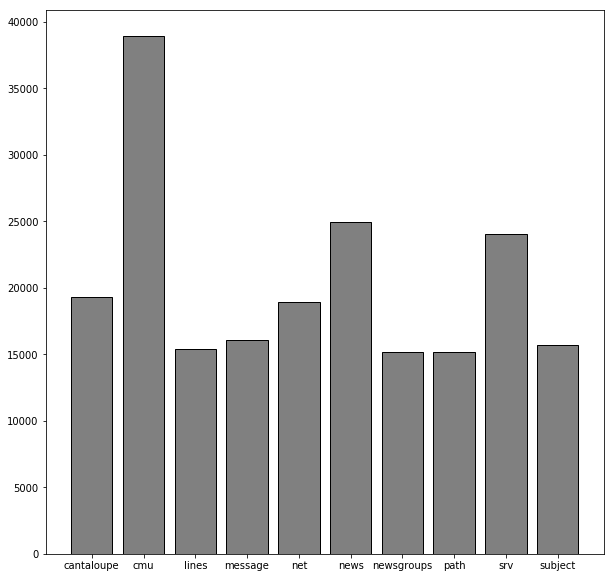

In [18]:
#Top 10 words in the feature set
plt.figure(figsize=(10,10))
plt.bar(words[0:10],count[0:10],color='grey',edgecolor='black')

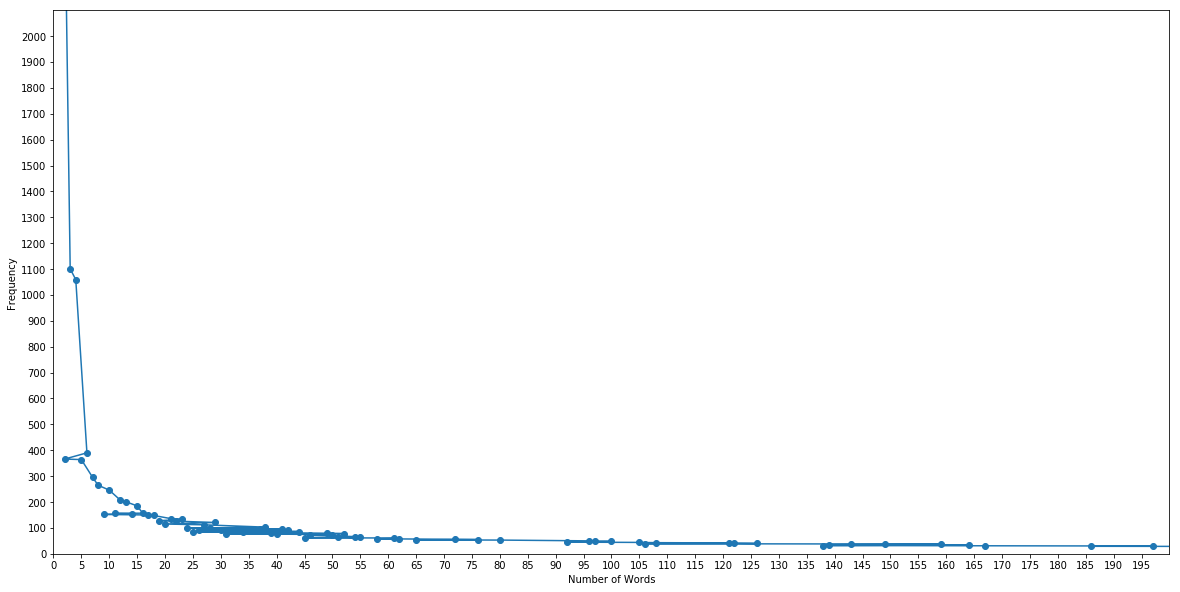

In [75]:
import numpy as np
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,2100,100))
plt.xlabel("Number of Words")
plt.ylabel('Frequency')
plt.xticks(np.arange(0,200,5))
plt.xlim(0,200)
plt.ylim(0,2100)
plt.plot(num_of_words,freq_of_words)
plt.scatter(num_of_words,freq_of_words)

In [77]:
comment_words=''
word_value=words[0:500]
count_value=count[0:500]
for i in range(len(count_value)):
    count_value[i]=int(count_value[i]/100)

In [83]:
for i in range(len(word_value)):
    word=word_value[i]
    count=count_value[i]
    for j in range(count):
        comment_words+=word+' '

### Creating the wordcloud
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

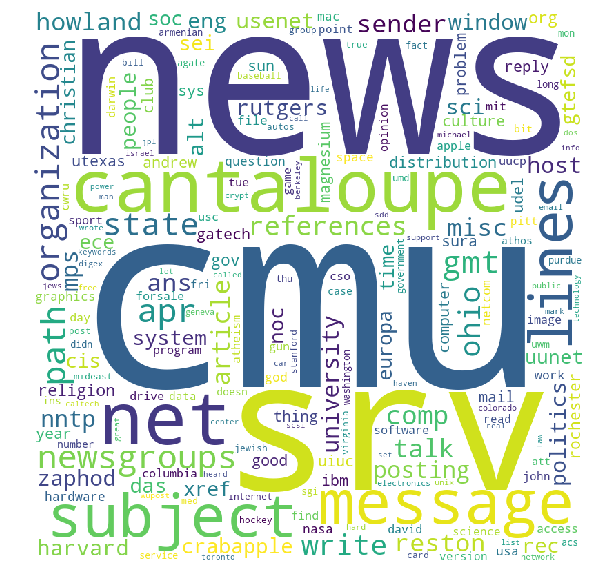

In [87]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                collocations = False,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


### Building the training data 

#### Now we will choose first 1000 of the words from this list and will make that list as our feature set
When the dataset is huge we want to reduce the complexity as much as possible.Initially we took 500 and then compared it with this and the accuracy was pretty low then we took 1500 and compared the accuracy.In the latter case the complexity is 1.5 times but the accuracy also increased by 1%.When we are dealing with problems like this where we have a complexity accuracy tradeoff.We either increase the accuracy as much as possible which increases the complexity or we try to balance this and this whole process depends on the application.When we are doing reasearch on something like this we only focus on accuracy and while making an app we want to reduce the complexity as much as possible.Here as we are making a web app by experimenting with some random values we chose 1000.  

In [19]:
feature_set=words[0:1000]

In [20]:
np.savetxt("feature_set.csv",feature_set,fmt="%s",delimiter=",")

In [21]:
feature_set[:5]

['cmu', 'news', 'srv', 'cantaloupe', 'net']

#### Now we will create a 2d array where number of rows will be the number of documents we have In this case it is 20 and column will be 1000 as this is the length of our feature set

In [23]:
#Initially we will have all the values set to zero
X_train=np.zeros((15000,1000))

### Code to make training data from the documents

## Steps used in this process
1) Take two variables X_train to store training data and Y_train to store target data <br>
2) Now open each file in a document.Here each file will be a row.<br>
3) Read the contents in a variable.Use reg exp and extract all the words in that file<br>
4) Now iterate over the words and do the following:<br>
If that word is present in the vocabulary increment the count of that column.If not present continue.<br>
Repeat from step 2 for all all the documents

In [24]:
Y_train=[]
i=0
#Go to each folder in the folder 20_newsgroups
for document in os.listdir('20_newsgroups/'):
    new_path=os.path.join('20_newsgroups/',document)
    #Go to each file
    for file in os.listdir(new_path):
        new_file_path=os.path.join(new_path,file)
        f=open(new_file_path,'r')
        content=f.read()
        #Generate the tokens using regular expression
        tokens=re.compile('\w+').findall(content)
        #Iterate over the tokens and if found in feature set add this in the particular location in the 2d array
        for token in tokens:
            if token in feature_set:
                X_train[i][feature_set.index(token)]+=1
        Y_train.append(document)
        i+=1

In [25]:
##Initially I thought there were 15000 total file but there were 14997 so I removed the last 3 rows
X_train.shape

(15000, 1000)

In [26]:
X_TRAIN=X_train[0:14997,:]

In [80]:
np.savetxt('y_train.csv',Y_train,fmt="%s",delimiter=',')

In [27]:
len(Y_train)
i

14997

### THIS IS DONE AFTER DATA IS SPLIT INTO TRAINAND TEST AND VOCAB IS MADE ON TRAIN DATA

In [28]:
np.savetxt('after_train.csv',X_TRAIN,fmt='%i',delimiter=',')

In [29]:
X_train_after=np.loadtxt('after_train.csv',dtype=int,delimiter=',')

In [30]:
X_train_after.shape

(14997, 1000)

In [31]:
import pandas as pd
df_train=pd.DataFrame(X_train_after,columns=feature_set)
df_train.head()

,cmu,news,srv,cantaloupe,net,message,subject,lines,newsgroups,path,...,blood,hey,analysis,stupid,ron,spot,phil,street,convert,purpose
0,5,4,3,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,3,3,2,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,2,3
2,3,2,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Creating the target array
Y_target=[]
for files in os.listdir('20_newsgroups/'):
    Y_target.append(files)

In [33]:
#Printing the target array
Y_target

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Creating a similar dataframe for test data

### Steps Performed
Same thing we did for training data

In [34]:
X_test=np.zeros((5000,1000))
Y_test=[]
i=0
#Go to each folder in the folder 20_newsgroups
for document in os.listdir('20_newsgroupd_test/'):
    new_path=os.path.join('20_newsgroupd_test//',document)
    #Go to each file
    for file in os.listdir(new_path):
        new_file_path=os.path.join(new_path,file)
        f=open(new_file_path,'r')
        content=f.read()
        #Generate the tokens using regular expression
        tokens=re.compile('\w+').findall(content)
        #Iterate over the tokens and if found in feature set add this in the particular location in the 2d array
        for token in tokens:
            if token in feature_set:
                X_test[i][feature_set.index(token)]+=1
        Y_test.append(document)
        i+=1

In [35]:
X_test.shape

(5000, 1000)

In [36]:
#Saving our Testing data in a csv file
np.savetxt('after_split_test.csv',X_test,fmt="%i",delimiter=',')

In [37]:
#Loading from that csv file
X_test_after_save=np.loadtxt('after_split_test.csv',dtype=int,delimiter=',')

In [38]:
df_test=pd.DataFrame(X_test,columns=feature_set)

In [39]:
df_test.head()

,cmu,news,srv,cantaloupe,net,message,subject,lines,newsgroups,path,...,blood,hey,analysis,stupid,ron,spot,phil,street,convert,purpose
0,3.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
len(Y_test)

5000

### Using sklearn's MULTINOMIAL NAIVE BAYES

In [41]:
from sklearn.naive_bayes import MultinomialNB

### Using Grid Search to select the best parameters

In [59]:
from sklearn.model_selection import GridSearchCV

In [69]:
nb=MultinomialNB()
dic={"alpha":[0.01,0.001,0.005,1,100,0.0001,0.015,0.067,0.7,0.54,0.43]}
cv=GridSearchCV(nb,dic)
cv.fit(X_TRAIN,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.001, 0.005, 1, 100, 0.0001, 0.015, 0.067, 0.7, 0.54, 0.43]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
## Best Estimators
cv.best_estimator_

MultinomialNB(alpha=0.54, class_prior=None, fit_prior=True)

In [71]:
ab=MultinomialNB(alpha=0.54)

In [72]:
ab.fit(X_TRAIN,Y_train)

MultinomialNB(alpha=0.54, class_prior=None, fit_prior=True)

In [73]:
y_pred_sk=ab.predict(X_test)

In [74]:
y_pred_sk

array(['alt.atheism', 'talk.politics.guns', 'alt.atheism', ...,
       'alt.atheism', 'alt.atheism', 'talk.politics.mideast'],
      dtype='<U24')

In [75]:
#Training score earlier=0.899
ab.score(X_TRAIN,Y_train)

0.8945789157831566

In [76]:
#Testing Score earlier=0.808
ab.score(X_test,Y_test)

0.808

In [77]:
#Printing Cassification report for the inbuilt sklearn Naive Bayes
print(classification_report(y_pred_sk,Y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.51      0.57       317
           comp.graphics       0.61      0.58      0.60       260
 comp.os.ms-windows.misc       0.78      0.75      0.76       260
comp.sys.ibm.pc.hardware       0.91      0.69      0.79       328
   comp.sys.mac.hardware       0.76      0.90      0.82       212
          comp.windows.x       0.65      0.66      0.65       248
            misc.forsale       0.85      0.95      0.90       224
               rec.autos       0.95      0.89      0.92       267
         rec.motorcycles       0.92      0.97      0.95       238
      rec.sport.baseball       0.95      0.98      0.97       243
        rec.sport.hockey       0.97      0.94      0.96       258
               sci.crypt       0.94      0.98      0.96       241
         sci.electronics       0.81      0.87      0.84       231
                 sci.med       0.96      0.93      0.94       256
         

In [78]:
#Printing Confusion Matrix
print(confusion_matrix(y_pred_sk,Y_test))

[[163   0   0   0   0   0   0   0   0   0   0   1   0   2   4   0   0   2
    2 143]
 [  0 152   0   3   6  49   1   0   2   0   0   8  14   6  18   0   0   0
    0   1]
 [  1  18 195   7   3  28   4   0   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0  14  15 227  47   2   9   1   0   0   0   0  12   0   1   0   0   0
    0   0]
 [  0   6   0  10 190   1   4   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  48  35   0   0 163   0   0   1   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   3   0   0   3   1 213   0   1   0   1   0   2   0   0   0   0   0
    0   0]
 [  0   0   1   0   0   0   8 237  12   0   0   0   8   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   4 231   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1 238   4   0   0   0   0   0   0   0
    0   0]
 [  2   0   0   0   0   1   0   1   0  10 243   0   0   1   0   0   0   0
    0   0]
 [  1   1   0   0   1   2   0   0   0   0   0 235   0   0   0   0

### Writing the algorithm for multinomial Naive Bayes

### How to training the model on training data?
So We wrote a fit function which will use the training data to train the model.
we are taking a dictionary and the dictionary will be a multilevel dictionary where In the first level we are storing the classes and the total number of documents in the training data.Then we are iterating over each class and making another dictionary where we are storing count of each feature(word in this case) i.e the sum of all the rows in that column and we are also storing the number of documents in a class.

In [50]:
def fit(X_train,Y_train,feature_set):
    res=dict()
    #Storing the total count of documents in the first level
    res['total_num_documents']=len(X_train)
    #Getting distinct classes 
    cur_class=set(Y_train)
    #Iterating over all the classes
    for clas in cur_class:
        #Creating a dict for that class
        res[clas]=dict()
        #Filtering out the total training data to contain only the data with Y_train as current clas
        x_train=X_train[Y_train==clas]
        y_train=Y_train[Y_train==clas]
        #Number of features i.e number of columns will be the at the first index of X_train.shape
        num_of_feature=x_train.shape[1]
        #Storing the total count of all the words in that class
        res[clas]['total_class_count']=x_train.sum()
        #String the number of documents in the class
        res[clas]['document_each_class']=len(x_train)
        number_of_feature=X_train.shape[1]
        #Iterating over all the features and for each word storing the count of that word in the current class
        for j in range(number_of_feature):
            res[clas][feature_set[j]]=x_train[:,j].sum()
    return res

## Probability Function
This functions takes the dictionary,current class,a row of the testing data and the feature set.I'm using bayes theorem here to calculate: $$ P(y=currentclass \mid \sum_{j=0}^n X^j=x^j) $$ <br>
According to bayes Theorem :$$ P(y=currentclass \mid \sum_{j=0}^n X^j=x^j)=\frac{P(\sum_{j=0}^n X^j=x^j \mid y=currentclass) \, P(y=currentclass)}{P(X)}$$<br>
So As P(X)  is common is all we can ignore this.We find this probability for all the classes and choose the one with maximum probability.In my probabillity function initially we find the P(y=current_class) which is nothing but the number of documents in that class divided by total number of documents.In Naive Bayes we make an assumption that all the features are independent and we can find<br>
$$P(\sum_{j=0}^n X^j=x^j \mid y=currentclass)$$ By $$\prod_{i=1}^{num_of_features}P(X^j=x^j \mid y=currentclass)$$<br>
So we find probability for each feature and then take the product and then multiply it with Class probability.To make the calculations more simple we take all the probabilities as Log probabilities as then we have to find the sum instead of product

In [51]:
def probability(diction,x,clas,feature_set):
    #Finding the Probability i.e P(y=current class)
    output=np.log(diction[clas]['document_each_class'])-np.log(diction['total_num_documents'])
    #Since 
    feature=len(diction[clas].keys())-2
    try:
        for j in range(feature):
            xj=x[j]
            if xj==0:
                class_prob=0
            else:
                #Laplace Correction is done to avoid any errors
                current_class_with_xj=diction[clas][feature_set[j]]+1
                current_class_count=diction[clas]['total_class_count']+1001
                class_prob=np.log(current_class_with_xj)-np.log(current_class_count)
            output+=class_prob
    except:
        print(clas,xj,j,feature[j])
    return output

### Pred Function
This function selects the best class of all the classes.This function iterates over all this classes and call probability function and then find the best class out of all the classes and returns that class

In [52]:
def pred(diction,x,feature_set):
    #Findind the total distinct classes
    cur_class=list(diction.keys())
    best_p=-99
    best_class=0
    #initially we want to store the result in the best p and class that is why flag is true initially
    flag=True
    #Iterating over the classes
    for clas in cur_class:
        #Class will contain total_num_document also and we want to ignore that
        if clas=='total_num_documents':
            continue
        else:
            #Call the probability function which will return the class probability
            p_class=probability(diction,x,clas,feature_set)
            if flag or p_class>best_p:
                best_p=p_class
                best_class=clas
            flag=False
    return best_class

## Predict Class Function
In this function we iterate over the X_test and pass each row to pred function which returns the predicted class.It stores this predicted class in a list and then returns the list

In [53]:
def predict_class(diction,X_test,feature_set):
    y_pred=[]
    #Iterate over all the rows
    for x in X_test:
        #call pred function
        x_class=pred(diction,x,feature_set)
        y_pred.append(x_class)
    return y_pred

In [54]:
Y_tra=np.array(Y_train)

In [55]:
dic=fit(X_TRAIN,Y_tra,feature_set)

In [56]:
y_pred=predict_class(dic,X_test,feature_set)

### Accuracy of our classifier

In [57]:
#Printing Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.51      0.73      0.60       250
           comp.graphics       0.49      0.61      0.54       250
 comp.os.ms-windows.misc       0.77      0.74      0.75       250
comp.sys.ibm.pc.hardware       0.70      0.90      0.79       250
   comp.sys.mac.hardware       0.89      0.75      0.81       250
          comp.windows.x       0.60      0.63      0.62       250
            misc.forsale       0.97      0.85      0.91       250
               rec.autos       0.93      0.96      0.95       250
         rec.motorcycles       0.99      0.96      0.98       250
      rec.sport.baseball       0.99      0.96      0.97       250
        rec.sport.hockey       0.96      0.99      0.97       250
               sci.crypt       0.97      0.90      0.94       250
         sci.electronics       0.90      0.84      0.87       250
                 sci.med       0.90      0.94      0.92       250
         

In [58]:
#Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[183   1   0   0   0   0   0   0   0   0   0   0   2   2   2   0   1   2
    0  57]
 [  0 152  17   7   7  59   3   0   0   0   0   0   3   2   0   0   0   0
    0   0]
 [  0   3 185  17   1  44   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   5   7 226  11   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  10   1  47 187   1   2   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  60  26   2   0 158   1   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0   0   1  14   4   0 213   8   0   0   0   0   3   5   1   0   0   1
    0   0]
 [  0   1   0   0   0   0   0 241   2   0   0   0   2   0   0   0   2   2
    0   0]
 [  0   2   0   0   0   0   0   6 240   1   0   0   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0   0 239  11   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   1 247   0   0   1   0   0   0   0
    1   0]
 [  1  19   0   1   0   0   0   0   0   0   0 226   0   1   0   0

## Results
So the algorithm we wrote has a precision of 80% whereas the inbuilt sklearn's Multinomial Naive Bayes has a precision of 83%.According to Stanford Scientists the best possible precision is 85%.The algorithm we wrote can be further optimized to increase the accuracy.We can run the algorithm parallely and by this we can reduce the computation time.Naive bayes is a very simple algorithm but for classification like this It is a powerful algorithm.WE can also use Naive Bayes for spam identification and many other classification problems.